In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('log.csv')

In [217]:
df.columns

Index(['case', 'event', 'startTime', 'completeTime', 'office_w', 'agecategory',
       'NumberWerkMapMessages', 'office_u', 'NumberComplaints', 'gender',
       'variant-index', 'NumberQuestions', 'variant', 'variantindex',
       'questionsubtheme_en', 'url_file', 'NumberComplaintsSoFar',
       'NumberQuestionsSoFar', 'complaintdossierid', 'tip', 'questiontopic_en',
       'event_agecategory', 'page_action_detail_en', 'complaintid', 'vhost',
       'page_action_detail', 'NumberWerkMapMessagesSoFar', 'contactchannelid',
       'event_gender', 'complainttopicid', 'activity', 'complainttheme_en',
       'complaintthemeid', 'complaintsubthemeid', 'complaintsubtheme_en',
       'page_load_error', 'questionthemeid', 'sessionid', 'ref_url_category',
       'questiontopicid', 'questionsubthemeid', 'event_office_w', 'tip_en',
       'service_detail', 'ipid', 'event_office_u', 'questiontheme_en',
       'complainttopic_en', 'service_detail_en'],
      dtype='object')

# select columns with complaints and questions

In [218]:
x = 'complaint'
comp = [y for y in df.columns if x in y]

x= 'question'
ques = [y for y in df.columns if x in y]

## What are the most asked questions?

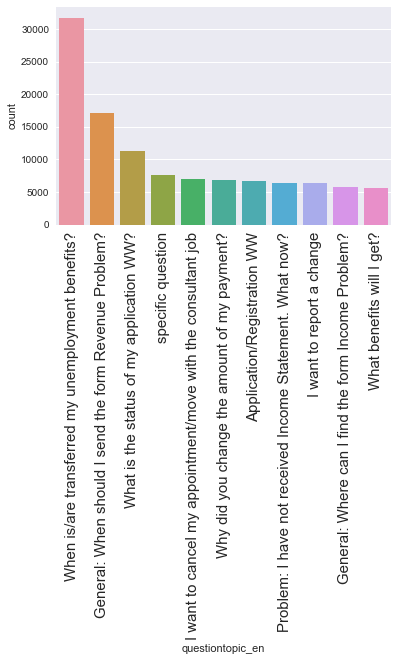

In [221]:
top_ques=df[df['questiontopic_en'].isin(df['questiontopic_en'].value_counts().index[:11])]
g=sns.countplot(x='questiontopic_en', 
              data=top_ques, 
              order=df['questiontopic_en'].value_counts().index[:11])
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)

## What are the most frequent complaints?

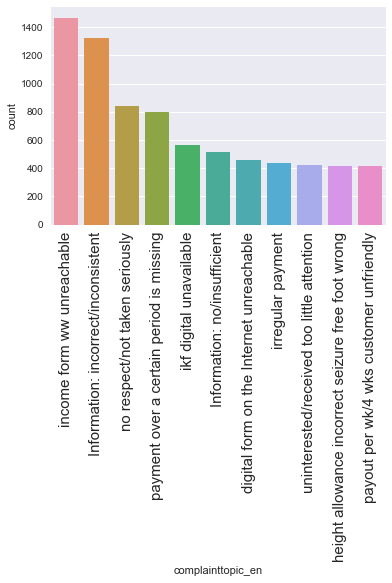

In [222]:
top_comp=df[df['complainttopic_en'].isin(df['complainttopic_en'].value_counts().index[:11])]
g=sns.countplot(x='complainttopic_en', 
              data=top_comp, 
              order=df['complainttopic_en'].value_counts().index[:11])
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)

# We have couple of attributes related to questions and complaints
However, we want to know the relations between them

In [244]:
COMP={}
for i in comp:
    #print(i, df[i].nunique())
    COMP[i]=df[i].nunique()
    
#print('\n')
QUES={}
for i in ques:
    #print(i, df[i].nunique())
    QUES[i]=df[i].nunique()
    
    
sort_comp=pd.DataFrame([COMP]).T[0].sort_values()
sort_ques=pd.DataFrame([QUES]).T[0].sort_values()

## #of unique elements per question attribute

In [245]:
sort_ques

questiontheme_en        13
questionthemeid         14
questionsubtheme_en    133
questionsubthemeid     155
questiontopic_en       772
questiontopicid        925
Name: 0, dtype: int64

## #of unique elements per complaint attribute

In [246]:
sort_comp

complainttheme_en         3
complaintthemeid          3
complaintsubtheme_en      5
complaintsubthemeid       5
complainttopic_en        70
complainttopicid         70
complaintdossierid      256
complaintid             289
Name: 0, dtype: int64

In [267]:
Unique={}
for i in df.columns:
    Unique[i]=df[i].nunique()

sort_unique=pd.DataFrame([Unique]).T[0].sort_values(ascending=False)

sort_unique=pd.DataFrame(sort_unique)
sort_unique.columns=['Count']
sort_unique

,Count
startTime,481325
completeTime,481324
sessionid,106221
ipid,10641
case,4226
variant,4225
variant-index,4224
questiontopicid,925
questiontopic_en,772
url_file,355


# Important events?
There are many events. However, it seems like we have to deal with events with Questions, Complaints and Werkmap activities.

In [268]:
events=list(df['event'].unique())
events_noVisit=list(filter(lambda x: 'Visit' not in x, a[1:]))

# Activy == event

In [270]:
df[df['activity']!=df['event']]

,case,event,startTime,completeTime,office_w,agecategory,NumberWerkMapMessages,office_u,NumberComplaints,gender,...,questiontopicid,questionsubthemeid,event_office_w,tip_en,service_detail,ipid,event_office_u,questiontheme_en,complainttopic_en,service_detail_en
0,1445,NaN,2015/08/07 10:51:41.000,2015/08/07 10:51:41.000,291,30-39,0,296,0,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
df[df['event']=='File Complaint'][['case', 'event', 'startTime', 'NumberComplaints','NumberComplaintsSoFar']]

,case,event,startTime,NumberComplaints,NumberComplaintsSoFar
564,6012,File Complaint,2016/02/12 23:00:00.000,1,1.0
721,6607,File Complaint,2016/01/28 23:00:00.000,1,1.0
4083,18444,File Complaint,2016/01/22 23:00:00.000,1,1.0
4222,20476,File Complaint,2015/08/04 23:00:00.000,1,1.0
6549,30294,File Complaint,2016/01/13 23:00:00.000,1,1.0
8919,52839,File Complaint,2015/09/22 23:00:00.000,1,1.0
10560,63430,File Complaint,2015/09/01 23:00:00.000,1,1.0
11021,66885,File Complaint,2015/07/03 23:00:00.000,2,1.0
11032,66885,File Complaint,2015/07/31 23:00:00.000,2,2.0
12227,70285,File Complaint,2016/02/11 23:00:00.000,1,1.0


In [286]:
events_noVisit

['Question', 'Werkmap message', 'File Complaint']